## Data Exploration

Link for data download: https://figshare.com/articles/dataset/The_dataset/22363012?file=43283628

In [ ]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from matplotlib.image import imread
import pandas as pd
from PIL import Image
import cv2
import zipfile
import random
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print("New working directory:", os.getcwd())#zip_path = 'drive/MyDrive/CSE 151A Final Project/FracAtlas.zip'
zip_path = 'FracAtlas.zip'
extract_dir = 'fracatlas_extracted'

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

images_dir = os.path.join(extract_dir, 'FracAtlas/images')
annotations_dir = os.path.join(extract_dir, 'FracAtlas/Annotations/YOLO')
# Checked to see if each image has a corresponding label

categories = ['Fractured', 'Non_fractured']

for cat in categories:
    category_path = os.path.join(images_dir, cat)

    for img_file in os.listdir(category_path):
        if img_file.endswith(('.jpg', '.jpeg', '.png')):
            img_name = os.path.splitext(img_file)[0]
            annotation_file = img_name + '.txt'
            annotation_path = os.path.join(annotations_dir, annotation_file)

New working directory: /content


In [ ]:
images_dir = 'fracatlas_extracted/FracAtlas/images'
annotations_dir = 'fracatlas_extracted/FracAtlas/Annotations/YOLO'

images = []
labels = []

for category in os.listdir(images_dir):
    category_path = os.path.join(images_dir, category)

    if not os.path.isdir(category_path):
        continue

    for img_file in os.listdir(category_path):
        if img_file.endswith(('.jpg', '.jpeg', '.png')):
            img_name = os.path.splitext(img_file)[0]
            annotation_file = img_name + '.txt'
            annotation_path = os.path.join(annotations_dir, annotation_file)

            if os.path.exists(annotation_path):
                img_path = os.path.join(category_path, img_file)
                images.append(img_path)
                labels.append(category)
            else:
                print(f"No annotation found for {img_file} at {annotation_path}.")

data_dict_old = {
    "inputs": images,
    "labels": labels
}

print(f"{len(images)} image paths and {len(labels)} labels in organized data")

4083 image paths and 4083 labels in organized data


In [ ]:
unique_classes = list(set(data_dict_old['labels']))

print(f"Classes: {unique_classes}")

Classes: ['Non_fractured', 'Fractured']


In [ ]:
def count_images(folder_path):
    image_extensions = ('.jpg', '.jpeg', '.png')
    image_count = 0

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(image_extensions):
            image_count += 1

    return image_count

# Folder paths
fractured_folder_path = 'fracatlas_extracted/FracAtlas/images/Fractured'
nonfractured_folder_path = 'fracatlas_extracted/FracAtlas/images/Non_fractured'

# Count images in the Fractured folder
fractured_image_count = count_images(fractured_folder_path)
print(f"Number of fractured bone images: {fractured_image_count}")

# Count images in the Non_fractured folder
nonfractured_image_count = count_images(nonfractured_folder_path)
print(f"Number of non-fractured bone images: {nonfractured_image_count}")

Number of fractured bone images: 717
Number of non-fractured bone images: 3366


In [ ]:
image_sizes = []

for subset in categories:
    image_directory = os.path.join(images_dir, subset)

    # Check if the directory exists
    if not os.path.exists(image_directory):
        print(f"Warning: Directory '{image_directory}' does not exist.")
        continue

    image_files = os.listdir(image_directory)

    # Process image files
    for image_file in image_files:
        image_file_path = os.path.join(image_directory, image_file)

        try:
            with Image.open(image_file_path) as img:
                img.verify()
                img = Image.open(image_file_path)
                width, height = img.size
                image_sizes.append((width, height))

        except Exception as e:
            print(f"Error reading {image_file_path}: {e}")

# Display unique image sizes
unique_image_sizes = set(image_sizes)
print("Unique image sizes:")
for size in unique_image_sizes:
    print(size)

Unique image sizes:
(373, 214)
(2880, 2304)
(454, 373)
(1760, 2140)
(373, 454)
(181, 454)
(454, 310)
(1727, 2049)
(2304, 2880)
(296, 454)
(454, 454)


In [ ]:
# Determine if images are uniform
if(len(unique_image_sizes) == 1):
    print("Image sizes are uniform.")
else:
    print("Images are not uniform.")

Images are not uniform.


In [ ]:
unique_image_sizes = set(image_sizes)
print(f"Number of unique image sizes: {len(unique_image_sizes)}")

# Display unique image sizes
print("Unique image sizes:")
for size in unique_image_sizes:
    print(size)

# Find the most common image size
size_counter = Counter(image_sizes)
most_common_size = size_counter.most_common(1)[0]
print(f"\nMost common image size: {most_common_size[0]} with {most_common_size[1]} occurrences")

Number of unique image sizes: 11
Unique image sizes:
(373, 214)
(2880, 2304)
(454, 373)
(1760, 2140)
(373, 454)
(181, 454)
(454, 310)
(1727, 2049)
(2304, 2880)
(296, 454)
(454, 454)

Most common image size: (373, 454) with 2704 occurrences


In [ ]:
# Plot distribution of image sizes

for subset in categories:
    image_directory = os.path.join(images_dir, subset)

    # Check if the directory exists
    if not os.path.exists(image_directory):
        print(f"Warning: Directory '{image_directory}' does not exist.")
        continue

    image_files = os.listdir(image_directory)

    # Process each image file
    for image_file in image_files:
        image_file_path = os.path.join(image_directory, image_file)

        try:
            with Image.open(image_file_path) as img:
                img.verify()
                img = Image.open(image_file_path)
                width, height = img.size
                image_sizes.append((width, height))
        except Exception as e:
            print(f"Error reading {image_file_path}: {e}")

In [ ]:
# Print out the distribution of image sizes
widths, heights = zip(*image_sizes)

# Count the distribution of widths and heights
width_distribution = {width: widths.count(width) for width in set(widths)}
height_distribution = {height: heights.count(height) for height in set(heights)}

print("Width distribution:")
for width, count in sorted(width_distribution.items()):
    print(f"Width: {width} pixels, Count: {count}")

print("\nHeight distribution:")
for height, count in sorted(height_distribution.items()):
    print(f"Height: {height} pixels, Count: {count}")

Width distribution:
Width: 181 pixels, Count: 2
Width: 296 pixels, Count: 2
Width: 373 pixels, Count: 5410
Width: 454 pixels, Count: 2050
Width: 1727 pixels, Count: 2
Width: 1760 pixels, Count: 48
Width: 2304 pixels, Count: 606
Width: 2880 pixels, Count: 46

Height distribution:
Height: 214 pixels, Count: 2
Height: 310 pixels, Count: 2
Height: 373 pixels, Count: 2046
Height: 454 pixels, Count: 5414
Height: 2049 pixels, Count: 2
Height: 2140 pixels, Count: 48
Height: 2304 pixels, Count: 46
Height: 2880 pixels, Count: 606


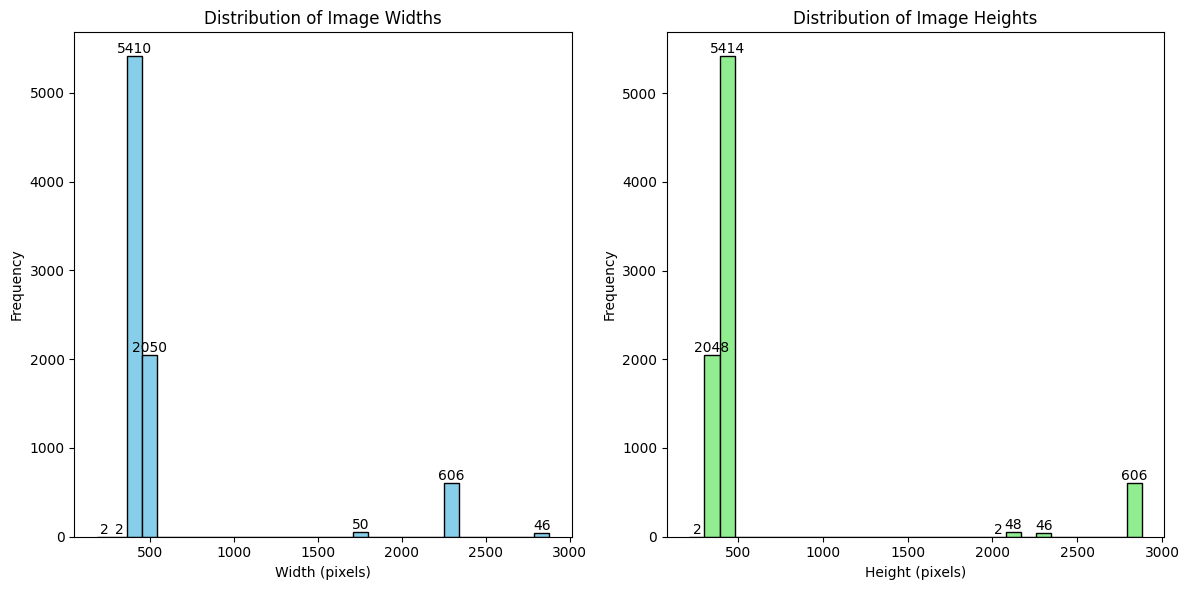

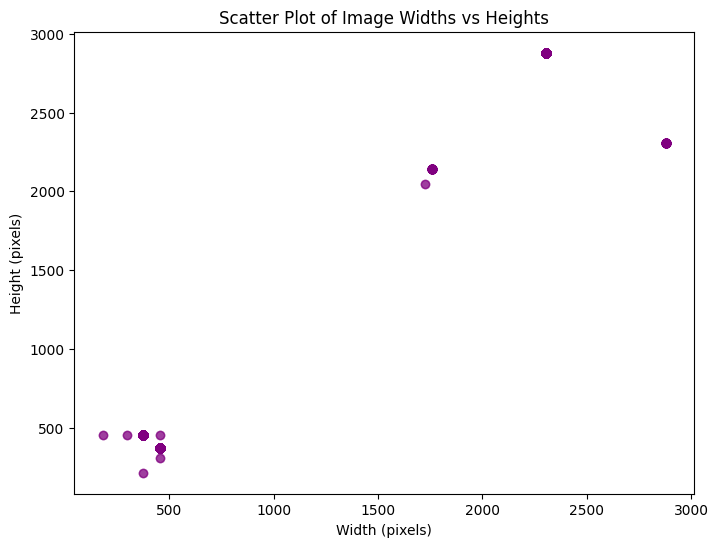

In [ ]:
# Plot the distribution of image sizes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for image widths
n, bins, patches = ax1.hist(widths, bins=30, color='skyblue', edgecolor='black')
ax1.set_title("Distribution of Image Widths")
ax1.set_xlabel("Width (pixels)")
ax1.set_ylabel("Frequency")

# Annotate bars in the histogram
for i in range(len(patches)):
    height = patches[i].get_height()
    if height > 0:
        ax1.text(patches[i].get_x() + patches[i].get_width() / 2, height, str(int(height)),
                 ha='center', va='bottom', fontsize=10)

# Plot histogram for image heights
n, bins, patches = ax2.hist(heights, bins=30, color='lightgreen', edgecolor='black')
ax2.set_title("Distribution of Image Heights")
ax2.set_xlabel("Height (pixels)")
ax2.set_ylabel("Frequency")

# Annotate bars in the histogram
for i in range(len(patches)):
    height = patches[i].get_height()
    if height > 0:
        ax2.text(patches[i].get_x() + patches[i].get_width() / 2, height, str(int(height)),
                 ha='center', va='bottom', fontsize=10)

# Display the plots
plt.tight_layout()
plt.show()

# Scatter plot of width vs height
plt.figure(figsize=(8, 6))
plt.scatter(widths, heights, alpha=0.5, color='purple')

plt.title("Scatter Plot of Image Widths vs Heights")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

In [60]:
# Function to convert image to grayscale
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Function to normalize pixel values to [0, 1]
def normalize(image):
    return image / 255.0

# Function to standardize the image data, mean=0 and std=1
def standardize(image):
    mean = np.mean(image)
    std = np.std(image)
    standardized_image = (image - mean) / std
    return standardized_image
# Convert images to grayscale and save
def convert_and_save_grayscale_images(folder_path, save_folder, target_size=(224, 224)):
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)  # Make sure save folder exists

    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for i, filename in enumerate(image_files):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)

        # Skip over corrupt images
        if image is None:
            warnings.warn(f"Skipping corrupt or unreadable image: {image_path}")
            continue

        image_resized = cv2.resize(image, target_size)

        # Convert to grayscale
        grayscale_image = convert_to_grayscale(image_resized)

        # Save the grayscale image
        processed_image_path = os.path.join(save_folder, f"grayscale_{i}.npy")
        np.save(processed_image_path, grayscale_image)

        # Free up memory
        del image, grayscale_image

    print("Grayscale conversion completed.")

# Normalize the grayscale images
def normalize_and_save_images(folder_path, save_folder):
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.npy')]

    for i, filename in enumerate(image_files):
        image_path = os.path.join(folder_path, filename)
        grayscale_image = np.load(image_path)

        # Normalize the grayscale image
        normalized_image = normalize(grayscale_image)

        # Save the normalized image
        processed_image_path = os.path.join(save_folder, f"normalized_{i}.npy")
        np.save(processed_image_path, normalized_image)
    print("Normalization completed.")

# Standardize the normalized images
def standardize_and_save_images(folder_path, save_folder):
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.npy')]

    for i, filename in enumerate(image_files):
        image_path = os.path.join(folder_path, filename)
        normalized_image = np.load(image_path)

        # Standardize the normalized image
        standardized_image = standardize(normalized_image)

        # Save the standardized image
        processed_image_path = os.path.join(save_folder, f"standardized_{i}.npy")
        np.save(processed_image_path, standardized_image)

        # Free up memory
        del normalized_image, standardized_image

    print("Standardization completed.")

In [61]:
frac_path = '/content/Processed/Final/Processed_Fractured_Final'
unfrac_path = '/content/Processed/Final/Processed_Non_Fractured_Final'

In [62]:
fractured_path = 'fracatlas_extracted/FracAtlas/images/Fractured'
non_fractured_path = 'fracatlas_extracted/FracAtlas/images/Non_fractured'

# Folders to save the processed images for fractured and non-fractured
grayscale_fractured_folder = 'Processed/Grayscale/Processed_Fractured_Grayscale'
grayscale_non_fractured_folder = 'Processed/Grayscale/Processed_Non_Fractured_Grayscale'

normalized_fractured_folder = 'Processed/Normalize/Processed_Fractured_Normalized'
normalized_non_fractured_folder = 'Processed/Normalize/Processed_Non_Fractured_Normalized'

standardized_fractured_folder = 'Processed/Final/Processed_Fractured_Final'
standardized_non_fractured_folder = 'Processed/Final/Processed_Non_Fractured_Final'

In [63]:
# Convert all fractured and non-fractured images to grayscale and save
convert_and_save_grayscale_images(fractured_path, grayscale_fractured_folder)
convert_and_save_grayscale_images(non_fractured_path, grayscale_non_fractured_folder)

# Normalize grayscale images for both fractured and non-fractured categories
normalize_and_save_images(grayscale_fractured_folder, normalized_fractured_folder)
normalize_and_save_images(grayscale_non_fractured_folder, normalized_non_fractured_folder)

# Standardize normalized images for both fractured and non-fractured categories
standardize_and_save_images(normalized_fractured_folder, standardized_fractured_folder)
standardize_and_save_images(normalized_non_fractured_folder, standardized_non_fractured_folder)

print("All preprocessing steps completed for both fractured and non-fractured images.")

Grayscale conversion completed.
Grayscale conversion completed.
Normalization completed.
Normalization completed.
Standardization completed.
Standardization completed.
All preprocessing steps completed for both fractured and non-fractured images.


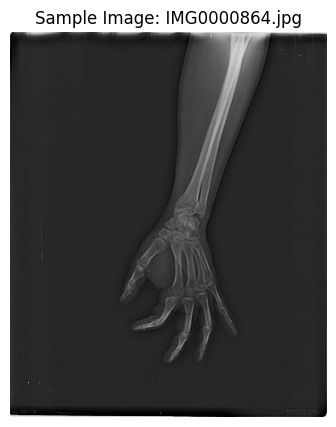

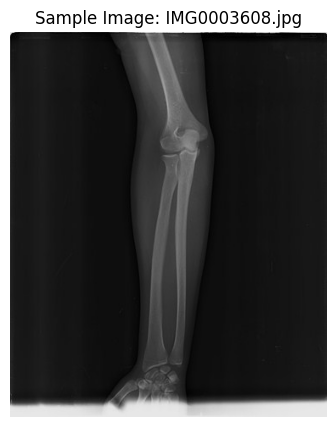

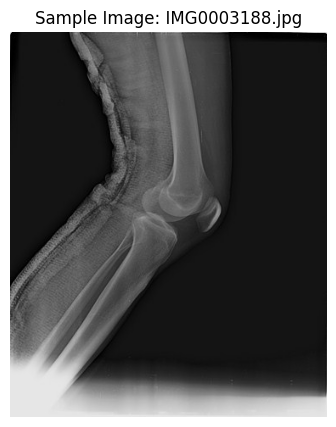

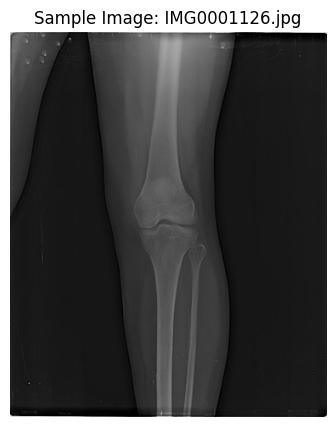

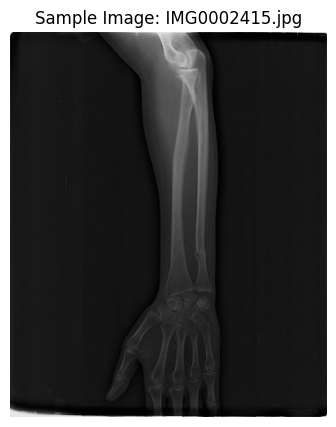

In [ ]:
all_image_paths = []

# Collect image paths from the directories
for subset in categories:
    image_directory = os.path.join(images_dir, subset)

    # Check if the directory exists
    if not os.path.exists(image_directory):
        print(f"Warning: Directory '{image_directory}' does not exist.")
        continue

    image_files = os.listdir(image_directory)

    # Filter and collect image paths with valid image extensions
    image_extensions = ('.jpg', '.jpeg', '.png')
    for image_file in image_files:
        if image_file.lower().endswith(image_extensions):
            image_file_path = os.path.join(image_directory, image_file)
            all_image_paths.append(image_file_path)

# Select 5 random images from the list of all image paths
sample_images = random.sample(all_image_paths, 5)

# Plot the selected sample images
for image_path in sample_images:
    try:
        # Open the image using PIL
        img = Image.open(image_path)
        # Display the image
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.title(f"Sample Image: {os.path.basename(image_path)}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error reading image {image_path}: {e}")

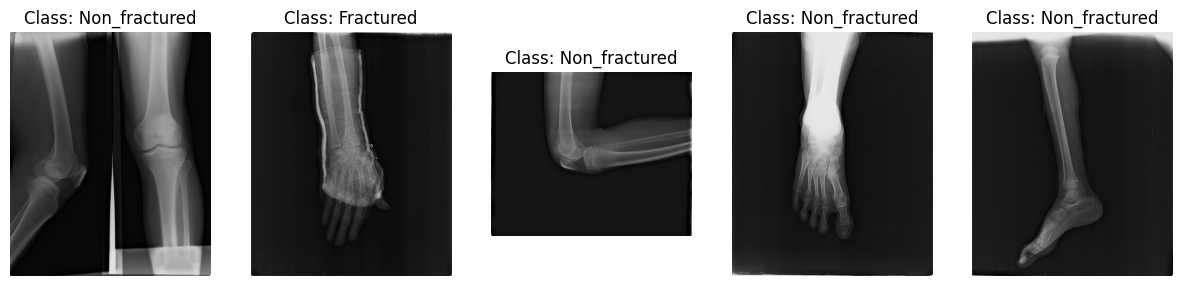

In [ ]:
# Number of images to plot
num_images_to_plot = 5

# Randomly select indices for images to display
random_indices = random.sample(range(len(data_dict_old["inputs"])), num_images_to_plot)

# Create a plot grid (in this case, a 1x5 grid)
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 5))

for i, index in enumerate(random_indices):
    # Get the image path and label
    img_path = data_dict_old["inputs"][index]
    label = data_dict_old["labels"][index]

    # Open the image
    img = Image.open(img_path)

    # Plot the image
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"Class: {label}")

# Show the plot
plt.show()

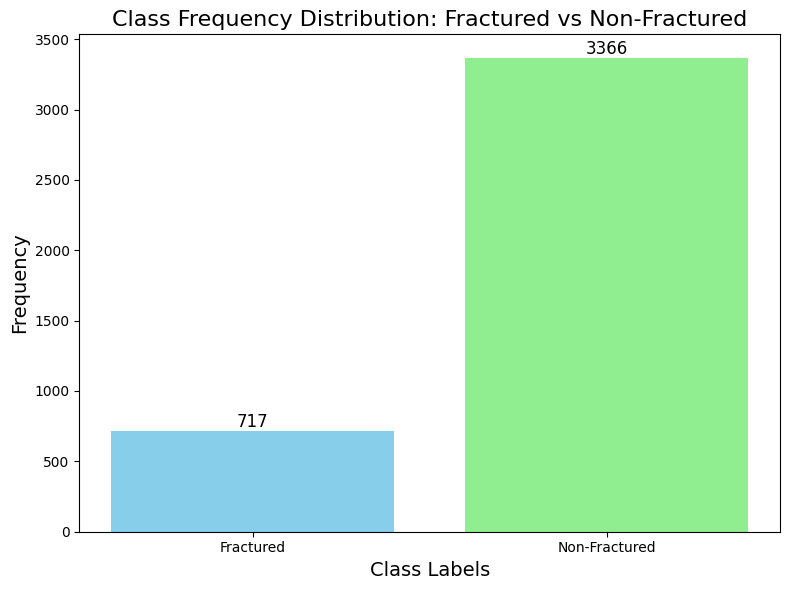

[717, 3366]


In [ ]:
# Plot distribution of classes

fractured_count = data_dict_old["labels"].count("Fractured")
nonfractured_count = data_dict_old["labels"].count("Non_fractured")

class_labels = ["Fractured", "Non-Fractured"]
class_frequencies = [fractured_count, nonfractured_count]

# Plot the frequency of each class as a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(class_labels, class_frequencies, color=['skyblue', 'lightgreen'])

# Add labels and title
plt.xlabel('Class Labels', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Class Frequency Distribution: Fractured vs Non-Fractured', fontsize=16)

# Display the numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(int(yval)),
             ha='center', va='bottom', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

print(class_frequencies)